In [1]:
import os
import numpy as np

para_dir = '../estimated'
version = 14
numpy_files = [f for f in os.listdir(para_dir) if f.find('para_v' + str(version)) > 0]
print(numpy_files)
num_files = len(numpy_files)
print(num_files)
parameters_combined=np.empty([num_files,311,10])
for i in range(num_files):
    # Load estimated parameters
    parameters_this = np.load('../estimated/scipy_all_para_v' + str(version) + '_' + str(i) + '.npy')
    parameters_combined[i, :, :] = parameters_this
averaged_parameters = np.mean(parameters_combined, axis = 0)

['scipy_all_para_v14_3.npy', 'scipy_all_para_v14_8.npy', 'scipy_all_para_v14_4.npy', 'scipy_all_para_v14_9.npy', 'scipy_all_para_v14_0.npy', 'scipy_all_para_v14_2.npy', 'scipy_all_para_v14_5.npy', 'scipy_all_para_v14_6.npy', 'scipy_all_para_v14_7.npy', 'scipy_all_para_v14_1.npy']
10


(311, 3, 145)


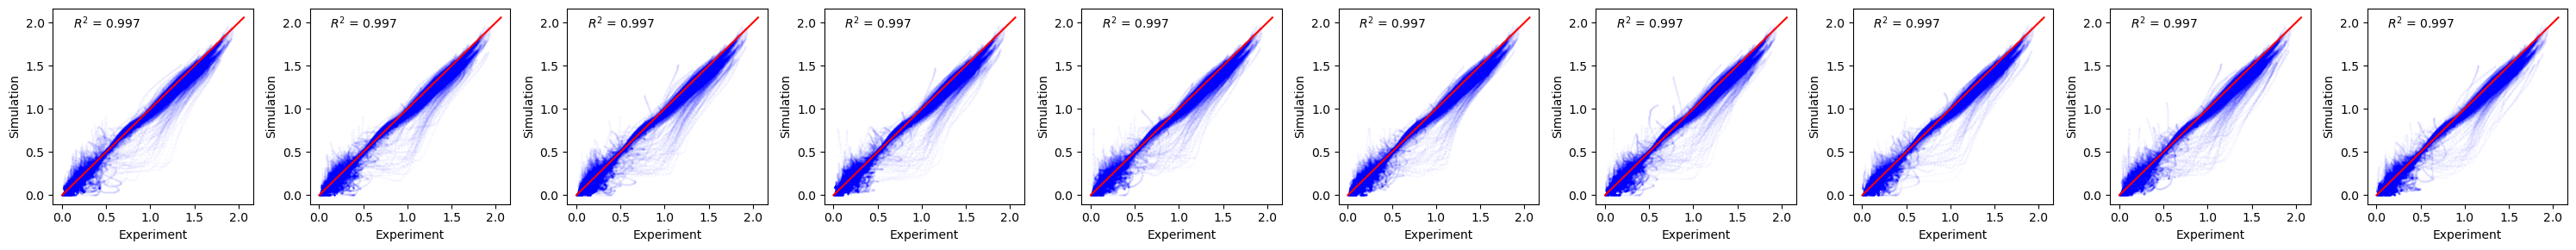

(311, 10, 3, 145)


In [2]:
# same as below but not averaged

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%run ../simulation/growth_complete.ipynb

# Load the experimental data
experimental_all = np.load('../isolates/avg_OD_all_isolates.npy')
print(experimental_all.shape)

#selected_parameters = parameters_combined[2, :, :, :]
#averaged_parameters = np.mean(selected_parameters, axis = 1)

# Define initial conditions
initial_conditions = [(0, 0), (10, 0), (10, 10)]

fig, axs = plt.subplots(1, num_files, figsize=(num_files*3, 3))
simulated = np.empty([311, num_files, 3, 145])

for k in range(num_files):
    for i in range(len(averaged_parameters)):
        for j, (a0, inh) in enumerate(initial_conditions):
            n0 = experimental_all[i, j, 0] 
            s = simulate(parameters_combined[k, i], n0, a0, inh)[0]
            simulated[i, k, j, :] = s
            axs[k].scatter(experimental_all[i, j], s, color='blue', s = 0.05, alpha=0.1)
            

    axs[k].set_xlabel('Experiment')
    axs[k].set_ylabel('Simulation')

    # Add y=x line to the plot
    xlim = axs[k].get_xlim()
    ylim = axs[k].get_ylim()
    lim = max(xlim[1], ylim[1])
    axs[k].plot([0, lim], [0, lim], color='red')

    # creates a list of R-squared values using a list comprehension
    r_squared_value = np.corrcoef(axs[k].collections[0].get_offsets().data[:,0], axs[k].collections[0].get_offsets().data[:,1])[0,1]**2
    axs[k].text(0.1, 0.9, f'$R^2$ = {r_squared_value:.3f}', transform=axs[k].transAxes)

plt.tight_layout()
plt.show()

np.save('../simulated/scipy_optimized/v' + str(version) + '_allsimulations', simulated)
print(simulated.shape)



(311, 3, 145)


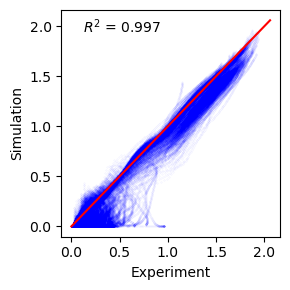

In [3]:
#in this segment, we average the 10 sets of parameters for each isolate.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%run ../simulation/growth_complete.ipynb

# Load the experimental data
experimental_all = np.load('../isolates/avg_OD_all_isolates.npy')
print(experimental_all.shape)

#selected_parameters = parameters_combined[2, :, :, :]
#averaged_parameters = np.mean(selected_parameters, axis = 1)


# Define initial conditions
initial_conditions = [(0, 0), (10, 0), (10, 10)]

fig, ax = plt.subplots(figsize=(3, 3))
simulatedfromavg = np.empty([311, 3, 145])

for i in range(len(averaged_parameters)):
    for j, (a0, inh) in enumerate(initial_conditions):
        n0 = experimental_all[i, j, 0] 
        s = simulate(averaged_parameters[i], n0, a0, inh)[0]
        simulatedfromavg[i, j, :] = s
        ax.scatter(experimental_all[i, j], s, color='blue', s = 0.05, alpha=0.1)

ax.set_xlabel('Experiment')
ax.set_ylabel('Simulation')

# Add y=x line to the plot
xlim = ax.get_xlim()
ylim = ax.get_ylim()
lim = max(xlim[1], ylim[1])
ax.plot([0, lim], [0, lim], color='red')

# creates a list of R-squared values using a list comprehension
r_squared_value = np.corrcoef(ax.collections[0].get_offsets().data[:,0], ax.collections[0].get_offsets().data[:,1])[0,1]**2
ax.text(0.1, 0.9, f'$R^2$ = {r_squared_value:.3f}', transform=ax.transAxes)

plt.tight_layout()
plt.show()

np.save('../simulated/scipy_optimized/v' + str(version) + '_avgsimulated', simulatedfromavg)



[55, 171, 215, 201, 203, 246, 86, 103]


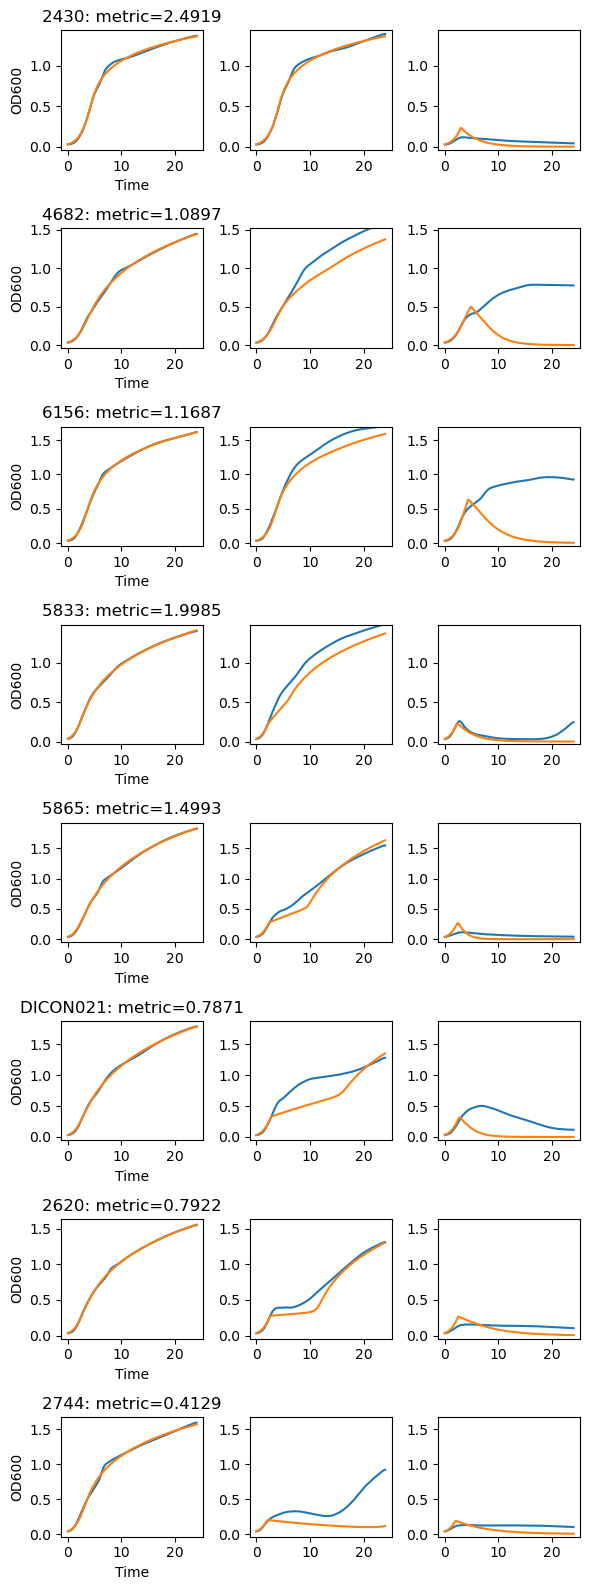

In [6]:
import numpy as np
import matplotlib.pyplot as plt

strain_ids = np.load('../isolates/strain_ids.npy', allow_pickle=True)
parameter_names = ['alpha','Ks','theta', 'Nm', 'kappab', 'phimax', 'gamma', 'betamin', 'db', 'c']
# Load the experimental data
experimental_all = np.load('../isolates/avg_OD_all_isolates.npy')

# Get Kappab values
kappab = averaged_parameters[:, parameter_names.index('kappab')]
betamin = averaged_parameters[:, parameter_names.index('betamin')]
phimax = averaged_parameters[:, parameter_names.index('phimax')]
gamma = averaged_parameters[:, parameter_names.index('gamma')]
db = averaged_parameters[:, parameter_names.index('db')]
c = averaged_parameters[:, parameter_names.index('c')]

# Compute the metric to evaluate BlaM-like strains?
#metric = betamin * kappab * gamma/db 
# metric = betamin
metric = (1 - c) * gamma * (1 - betamin)

# Assuming strain_ids is a numpy array
# strains_to_find = ['2405', '2529', '2620', '2744', '3132', '5752','5963','DICON047', 'DICON112', 'DICON174']
strains_to_find = ['2430', '4682', '6156', '5833', '5865','DICON021', '2620', '2744']

indices = [np.where(strain_ids == strain)[0][0] for strain in strains_to_find]
print(indices)

# Define initial conditions
initial_conditions = [(0, 0), (10, 0), (10, 10)]

# Time points for the simulation
t = np.linspace(0, 24, 145)
num_rows = len(indices)
fig, axs = plt.subplots(num_rows, 3, figsize=(6, 2 * num_rows))
# Label the top 10 strains
for i in range(num_rows):
    k = indices[i]
    p = averaged_parameters[k]
    # Loop through each condition
    for j, (a0, inh) in enumerate(initial_conditions):
        # Extract the corresponding experimental data
        experimental = experimental_all[k, j]

        # Set n0 using the first value of the experimental data
        n0 = experimental[0]

        # Run the simulation
        simulated = simulate(p, n0, a0, inh)

        # Plot the experimental and simulated data
        axs[i, j].plot(t, experimental, label='Experimental')
        axs[i, j].plot(t, simulated[0], label='Simulated')

                    #axs[j].legend()
        if j == 0:
            # axs[i, j].set_title(strain_ids[k] + ': betamin='+ f'{betamin[k]:.4f}')
            axs[i, j].set_title(strain_ids[k] + ': metric='+ f'{metric[k]:.4f}')

        if j == 0:
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('OD600')

        # If this is not the first panel, match y limit to the first panel
        if j > 0:
            # Set the title and labels
            axs[i, j].set_ylim(axs[i, 0].get_ylim())

# Show the figure
plt.tight_layout()
plt.show()
